# **Problem Set 10**

## **Tasks**
- Assembling A and S matrices
- Calculating d
- Grouping the different processes by life cycle stage
- Reading an SPA
- Answering the multiple choice questions

## **Passing requirement**
- **At least 80 points**

**_Please run the cell below before you start the assignment_**

In [1]:
# Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Folder for the files
files_folder = "files_PS10_V3_0/"

### In case formulas are entered in the csv files & correcting the datatypes
def convert_formulas(matrix):
    for row in matrix.index:
        for column in matrix.columns:
            if type(matrix.loc[row, column]) == str:
                if " " in matrix.loc[row, column]:
                    matrix.loc[row, column] = matrix.loc[row, column].lstrip(' ')
                if "=" in matrix.loc[row, column]:
                    matrix.loc[row, column] = matrix.loc[row, column].lstrip('=')
                matrix.loc[row, column] = pd.eval(matrix.loc[row, column])
    ### Get the data types right in the DataFrames
    s = matrix.select_dtypes(include='object').columns
    matrix[s] = matrix[s].astype("float64")
    return matrix

_**Disclaimer**: Mainstream LCA assessments normally use commercial LCI databases, such as Ecoinvent, for their background systems. These databases are, as the name indicates, commercial in nature and are as such not open access. We are therefore using an open-access mixed-unit version of EXIOBASE. This is an Input-Output database (IOT). So for your applications, you will in principle be using an IO-Hybrid LCA model rather than a conventional process-based LCA model. Have a look at [DOI: 10.5281/zenodo.7244918] and [DIO: 10.5281/zenodo.3583070] if you are interested in more details about the dataset you will be using. Please though note, that this dataset is only intended for training purposes in this course, so if you are planning to do project or thesis work on LCA, consult your supervisor to get access to suitable databases for your purpose._

## **LCA of Conventional and Electric Vehicles**

In this problem set you will compile a simplified life cycle inventory for:
1. An internal combustion engine vehicle powered by diesel (ICEV D)
2. An internal combustion engine vehicle powered by gasoline (ICEV G)
3. A fully battery powered vehicle (EV Li-NCM). The inventory provided for the battery is a proxy of a 50 kWh battery.

Then you will assess the environmental impact of these and run scenarios.

## **1. Data preparation** _(10 points)_

Run the cell below to import `Aff`, `Abf`, `Afb` and `Abb` as Pandas DataFrames.

In [2]:
Aff = convert_formulas(pd.read_csv(files_folder + 'Aff.csv', sep = ',', index_col = [0]))
Abf = convert_formulas(pd.read_csv(files_folder + 'Abf.csv', sep = ',', index_col = [0]))
Afb = convert_formulas(pd.read_csv(files_folder + 'Afb.csv', sep = ',', index_col = [0]))
Abb = convert_formulas(pd.read_csv(files_folder + 'Abb.csv', sep = ',', index_col = [0]))

Run the cell below to get the `C` matrix.

In [3]:
C = pd.read_csv(files_folder + 'C.csv', sep = ',', index_col = [0])

Run the cell below to get the `Sb` matrix.

In [4]:
Sb = pd.read_csv(files_folder + 'Sb.csv', sep = ',', index_col = [0])

Define `Sf` and build the entire `S` matrix.

Hint: Use the file **Direct_stressors_list_PS10.csv** and the function `fill_in_Sf_from_table(Sf, table)` which is given to transform data from a one column table to the matrix `Sf`. You also have to pre-define an empty `Sf` as it is one of the inputs needed by the function.

In [5]:
def fill_in_Sf_from_table(Sf, table):
    for i in Sf.index:
        for j in Sf.columns:
            if table[(table['Stressor'] == i) & (table['Foreground process'] == j)]['Value'].empty == False:
                Sf.loc[i, j] = table[(table['Stressor'] == i) & (table['Foreground process'] == j)]['Value'].values[0]
    return Sf

### This is importing the table
Sf_list = pd.read_csv(files_folder + 'Direct_stressors_list_PS10.csv')

In [6]:
Sf = pd.DataFrame(index=Sb.index, columns=Aff.columns)
Sf = fill_in_Sf_from_table(Sf, Sf_list)
#display(Sf)
Sf = Sf.fillna(0)
Sb = Sb.fillna(0)
S = pd.concat([Sf, Sb], axis = 1)
S = S.fillna(0)

**_Run the cell under to check the format of your answer(s)_**

In [7]:
assert S.isnull().values.any() == False, 'There are still NaN values in the matrix'
assert (S.index == Sb.index).all(), 'The index do not correspond'
assert (S.columns == list(Aff.columns) + list(Abb.columns)).all(), 'The columns do not correspond'

## **2. Total life cycle impacts for the two conventional vehicles and the electric vehicle (EV) powered by natural gas** _(25 points)_

#### **2a)** _(5 points)_ Fill in `Aff`

`Aff` is incomplete (operation phase (in km) of the three vehicles is missing) and you have to fill it in using the following information: all components are defined for 1 lifetime of the vehicle i.e. 180000 km. 

The "EV Li-NCM," "ICEV D," and "ICEV G" have the units "vehicle" and represent entire vehicles.

In [8]:
Aff = Aff.fillna(0)
display(Aff)

,EV Li-NCM,ICEV D,ICEV G,Body_and_Doors,Brakes_Friction,Chassis_FWD,Fluids_ICEV_and_EV,Interior_and_Exterior,Tires_and_Wheels,EV_Motor_and_transmission,...,Fluids_ICEV_only,Other_Powertrain_ICEV,Transmission_ICEV,PbA_Batteries_ICEV,Final_Assembly_Car,Operation diesel car,Operation gasoline car,Operation electric car,EOL_Vehicle_Treatment,EOL_Battery_TreatmentAndDisposal
EV Li-NCM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ICEV D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ICEV G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Body_and_Doors,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brakes_Friction,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chassis_FWD,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fluids_ICEV_and_EV,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interior_and_Exterior,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tires_and_Wheels,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EV_Motor_and_transmission,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**_Run the cell under to check the format of your answer(s)_**

In [9]:
assert Aff.isnull().values.any() == False, 'There are still NaN values in the matrix'
assert (Aff.index == ['EV Li-NCM', 'ICEV D', 'ICEV G', 'Body_and_Doors', 'Brakes_Friction', 'Chassis_FWD', 'Fluids_ICEV_and_EV', 'Interior_and_Exterior', 'Tires_and_Wheels', 'EV_Motor_and_transmission', 'Transmission_EV_Differential_Only', 'Battery_Li_NCM', 'Engine_ICEV', 'Fluids_ICEV_only', 'Other_Powertrain_ICEV', 'Transmission_ICEV', 'PbA_Batteries_ICEV', 'Final_Assembly_Car', 'Operation diesel car', 'Operation gasoline car', 'Operation electric car', 'EOL_Vehicle_Treatment', 'EOL_Battery_TreatmentAndDisposal'
                     ]).all(), 'The index do not correspond'
assert (Aff.columns == ['EV Li-NCM', 'ICEV D', 'ICEV G', 'Body_and_Doors', 'Brakes_Friction', 'Chassis_FWD', 'Fluids_ICEV_and_EV', 'Interior_and_Exterior', 'Tires_and_Wheels', 'EV_Motor_and_transmission', 'Transmission_EV_Differential_Only', 'Battery_Li_NCM', 'Engine_ICEV', 'Fluids_ICEV_only', 'Other_Powertrain_ICEV', 'Transmission_ICEV', 'PbA_Batteries_ICEV', 'Final_Assembly_Car', 'Operation diesel car', 'Operation gasoline car', 'Operation electric car', 'EOL_Vehicle_Treatment', 'EOL_Battery_TreatmentAndDisposal'
                     ]).all(), 'The columns do not correspond'

#### **2b)** _(5 points)_ Fill in `Abf`

Use the file **Foreground_Background_list_PS10.csv** to fill in `Abf`. You have to use the function `fill_in_Abf_from_table(matrix, table)` to transform data from a one column table to `Abf`. 

In [10]:
def fill_in_Abf_from_table(Abf, table):
    for i in Abf.index:
        for j in Abf.columns:
            if table[(table['Background process'] == i) & (table['Foreground process'] == j)]['Value'].empty == False:
                Abf.loc[i, j] = table[(table['Background process'] == i) & (table['Foreground process'] == j)]['Value'].values[0]
    return Abf

### This is importing the table
Abf_list = pd.read_csv(files_folder + 'Foreground_Background_list_PS10.csv')

In `Abf`, the fuel requirements (diesel, gasoline, electricity) for operation of the vehicles (in km) is not provided. We ask to calculate the fuel requirements based on the following information:
- 'Operation diesel car': requires input of 'Gas/Diesel Oil - tonnes'. The ICEVD required 4.4L of diesel per 100 km and has a density of 0.84 kg/L.
- 'Operation gasoline car': requires input of 'Gas/Diesel Oil - tonnes'. The ICEVG required 5.3L of gasoline per 100 km and has a density of 0.74 kg/L.
- 'Operation electric car': we assume that the electricity required is produced by gas ('Electricity by gas - TJ'). The vehicle requires 173 Wh of electricity per km driven. You also have to add that there are 14% of losses in the electricity distribution and charging process. Do not forget that 1 kWh = 3.6 MJ

In [11]:
Abf = fill_in_Abf_from_table(Abf, Abf_list)
Abf.loc['Gas/Diesel Oil - tonnes', 'Operation diesel car'] = ((4.4/100)*0.84)/1000
Abf.loc['Gas/Diesel Oil - tonnes', 'Operation gasoline car'] = ((5.3/100)*0.74)/1000
Abf.loc['Electricity by gas - TJ', 'Operation electric car'] = (173*1.14)*0.0036/(10**6)
Abf = Abf.fillna(0)
#display(Abf)

**_Run the cell under to check the format of your answer(s)_**

In [12]:
assert Abf.isnull().values.any() == False, 'There are still NaN values in the matrix'
assert (Abf.index == Abb.columns).all(), 'The index do not correspond'
assert (Abf.columns == Aff.columns).all(), 'The columns do not correspond'

#### **2c)** _(5 points)_ Fill in `Afb`, build the `A` matrix and calculate the `L` matrix

In [13]:
Afb = Afb.fillna(0)
A1 = pd.concat([Aff, Afb], axis = 1)
A2 = pd.concat([Abf, Abb], axis = 1)
A = pd.concat([A1, A2], axis = 0)
A = A.fillna(0)
#display(A)

I = np.identity(len(A))
Larr = np.linalg.inv(I-A)
L = pd.DataFrame(Larr, index = A.index, columns = A.columns)
#display(L)

**_Run the cell under to check the format of your answer(s)_**

In [14]:
assert (L.index == list(Aff.columns) + list(Abb.columns)).all(), 'The index do not correspond'
assert (L.columns == list(Aff.columns) + list(Abb.columns)).all(), 'The columns do not correspond'

#### **2d)** _(5 points)_ Calculate the output vectors `x_EV`, `x_ICEVD`, `x_ICEVG`

Run the cell below to get the `y_EV`, `y_ICEVD`, `y_ICEVG` vectors.

In [15]:
y_EV = convert_formulas(pd.read_csv(files_folder + 'y_EV.csv', sep = ',', index_col = [0]))
y_ICEVD = convert_formulas(pd.read_csv(files_folder + 'y_ICEVD.csv', sep = ',', index_col = [0]))
y_ICEVG = convert_formulas(pd.read_csv(files_folder + 'y_ICEVG.csv', sep = ',', index_col = [0]))

Fill in `y_EV`, `y_ICEVD`, `y_ICEVG`, calculate `x_EV`, `x_ICEVD`, `x_ICEVG` and rename their column into "Output".

In [16]:
y_EV = y_EV.fillna(0)
x_EV = L @ y_EV
x_EV = x_EV.rename(columns = {'Final demand' : 'Output'})
display(x_EV)

y_ICEVD = y_ICEVD.fillna(0)
x_ICEVD = L @ y_ICEVD
x_ICEVD = x_ICEVD.rename(columns = {'Final demand' : 'Output'})
display(x_ICEVD)

y_ICEVG = y_ICEVG.fillna(0)
x_ICEVG = L @ y_ICEVG
x_ICEVG = x_ICEVG.rename(columns = {'Final demand' : 'Output'})
display(x_ICEVG)

,Output
EV Li-NCM,1.000000e+00
ICEV D,2.207675e-19
ICEV G,1.622905e-16
Body_and_Doors,1.000000e+00
Brakes_Friction,1.000000e+00
...,...
Membership organisation services n.e.c. (91) - Meuro,7.639170e-06
Recreational; cultural and sporting services (92) - Meuro,9.869988e-06
Other services (93) - Meuro,2.003256e-05
Private households with employed persons (95) - Meuro,0.000000e+00


,Output
EV Li-NCM,4.039718e-16
ICEV D,1.000000e+00
ICEV G,-1.611999e-16
Body_and_Doors,1.000000e+00
Brakes_Friction,1.000000e+00
...,...
Membership organisation services n.e.c. (91) - Meuro,6.161682e-06
Recreational; cultural and sporting services (92) - Meuro,9.212860e-06
Other services (93) - Meuro,1.221167e-05
Private households with employed persons (95) - Meuro,0.000000e+00


,Output
EV Li-NCM,3.978720e-17
ICEV D,-9.305018e-16
ICEV G,1.000000e+00
Body_and_Doors,1.000000e+00
Brakes_Friction,1.000000e+00
...,...
Membership organisation services n.e.c. (91) - Meuro,6.368024e-06
Recreational; cultural and sporting services (92) - Meuro,9.555792e-06
Other services (93) - Meuro,1.252915e-05
Private households with employed persons (95) - Meuro,0.000000e+00


**_Run the cell under to check the format of your answer(s)_**

In [17]:
assert (x_EV.index == list(Aff.columns) + list(Abb.columns)).all(), 'The index do not correspond'
assert (x_EV.columns == ['Output']).all(), 'The columns do not correspond'
assert (x_ICEVD.index == list(Aff.columns) + list(Abb.columns)).all(), 'The index do not correspond'
assert (x_ICEVD.columns == ['Output']).all(), 'The columns do not correspond'
assert (x_ICEVG.index == list(Aff.columns) + list(Abb.columns)).all(), 'The index do not correspond'
assert (x_ICEVG.columns == ['Output']).all(), 'The columns do not correspond'

#### **2e)** _(5 points)_ Calculate `d_EV`, `d_ICEVD`, `d_ICEVG` and rename their column into "Total impacts"

In [18]:
d_EV = C @ S @ x_EV
d_EV = d_EV.rename(columns = {'Output' : 'Total impacts'})
display(d_EV)

d_ICEVD = C @ S @ x_ICEVD
d_ICEVD = d_ICEVD.rename(columns = {'Output' : 'Total impacts'})
display(d_ICEVD)

d_ICEVG = C @ S @ x_ICEVG
d_ICEVG = d_ICEVG.rename(columns = {'Output' : 'Total impacts'})
display(d_ICEVG)

,Total impacts
impact,
Acidification - AP (kg SO2-eq),173.574482
Climate change - GWP100 (kg CO2-eq),26575.109508
Eutrophication - EP (kg PO4-eq),81.281768
"Freshwater ecotoxity - FAETP 100 (kg 1,4-DCB-eq)",50.987634
"Human toxicity - HTP 100 (kg 1,4-DCB-eq)",28670.780119
Ozone layer depletion - ODP steady state (kg CFC-11-eq),0.000336
Photochemical oxidation (high NOx) - POCP (kg C2H4-eq),14.595965
"Terrestrial ecotoxicity - TETP 100 (kg 1,4-DCB-eq)",26.430446


,Total impacts
impact,
Acidification - AP (kg SO2-eq),93.909911
Climate change - GWP100 (kg CO2-eq),33820.280458
Eutrophication - EP (kg PO4-eq),60.605931
"Freshwater ecotoxity - FAETP 100 (kg 1,4-DCB-eq)",34.418921
"Human toxicity - HTP 100 (kg 1,4-DCB-eq)",21106.851579
Ozone layer depletion - ODP steady state (kg CFC-11-eq),0.000610
Photochemical oxidation (high NOx) - POCP (kg C2H4-eq),14.565787
"Terrestrial ecotoxicity - TETP 100 (kg 1,4-DCB-eq)",18.519932


,Total impacts
impact,
Acidification - AP (kg SO2-eq),93.362954
Climate change - GWP100 (kg CO2-eq),35254.596987
Eutrophication - EP (kg PO4-eq),57.223322
"Freshwater ecotoxity - FAETP 100 (kg 1,4-DCB-eq)",34.518964
"Human toxicity - HTP 100 (kg 1,4-DCB-eq)",21272.021035
Ozone layer depletion - ODP steady state (kg CFC-11-eq),0.000639
Photochemical oxidation (high NOx) - POCP (kg C2H4-eq),17.270200
"Terrestrial ecotoxicity - TETP 100 (kg 1,4-DCB-eq)",18.611226


**_Run the cell under to check the format of your answer(s)_**

In [19]:
assert (d_EV.index == C.index).all(), 'The index do not correspond'
assert (d_EV.columns == ['Total impacts']).all(), 'The columns do not correspond'
assert (d_ICEVD.index == C.index).all(), 'The index do not correspond'
assert (d_ICEVD.columns == ['Total impacts']).all(), 'The columns do not correspond'
assert (d_ICEVG.index == C.index).all(), 'The index do not correspond'
assert (d_ICEVG.columns == ['Total impacts']).all(), 'The columns do not correspond'

## 3. Manufacturing, use and end-of-life impacts in terms of climate change (kg CO2eq) for all vehicles _(20 points)_

We define `df_to_plot`, a DataFrame that you have to fill in by aggregating the different components/processes related to the vehicles according to their life cycle stages (Manufacturing, Use, End-of-life).

In [20]:
### DataFrame to fill in
df_to_plot = pd.DataFrame(index = ['Manufacturing (kg CO2eq)', 'Use (kg CO2eq)', 'End-of-life (kg CO2eq)'], columns = ['EV', 'ICEVD', 'ICEVG'])

### Displaying the table for you to see how it looks like before you fill it in in the cell below
display(df_to_plot)

,EV,ICEVD,ICEVG
Manufacturing (kg CO2eq),NaN,NaN,NaN
Use (kg CO2eq),NaN,NaN,NaN
End-of-life (kg CO2eq),NaN,NaN,NaN


Hint: The approach you have to use is similar to PS9. As you have to get manufacturing/use/end of life for the three vehicles, you might also want to write a function that does the calculations and use this function for each of the vehicle.

In [21]:
def calculate_Dprof(x):
    xf = x.iloc[:len(Aff), ]
    xf_i_marr = np.diag(xf["Output"])
    xf_i_m = pd.DataFrame(xf_i_marr, index = Aff.index, columns = Aff.columns)
    #display(xf)
    Mbf = Abf @ xf_i_m
    #display(Mbf)
    I_Abb = np.identity(len(Abb))
    Larr = np.linalg.inv(I_Abb-Abb)
    L_Abb = pd.DataFrame(Larr, index = Abb.index, columns =Abb.columns )

    Xbf = L_Abb @ Mbf
    #display(Xbf)
    Dproff = C @ Sf @ xf_i_m
    #display(Dproff)
    Dprobf = C @ Sb @ Xbf

    Dprof = Dproff + Dprobf
    #display(Dprof)
    return Dprof

def getting_info_from_Dprof(car_type, x, df_to_plot): #Car_type=''
    if car_type=='ICEVD':
        drivstoff = 'Operation diesel car' 
    else: 
        if car_type=='ICEVG':
            drivstoff = 'Operation gasoline car'
        else: drivstoff = 'Operation electric car'
    dprof = calculate_Dprof(x)
    #display(dprof)
    df_to_plot.loc['Manufacturing (kg CO2eq)', car_type] = sum(dprof.iloc[1, 2:17])
    df_to_plot.loc['Use (kg CO2eq)', car_type] = dprof.loc['Climate change - GWP100 (kg CO2-eq)', drivstoff]
    df_to_plot.loc['End-of-life (kg CO2eq)', car_type] = sum(dprof.iloc[1, 21:23])
    return df_to_plot

df_to_plot = getting_info_from_Dprof('ICEVD', x_ICEVD, df_to_plot)
df_to_plot = getting_info_from_Dprof('ICEVG', x_ICEVG, df_to_plot)
df_to_plot = getting_info_from_Dprof('EV', x_EV, df_to_plot)
display(df_to_plot)

,EV,ICEVD,ICEVG
Manufacturing (kg CO2eq),10156.217799,6461.168124,6461.168124
Use (kg CO2eq),15262.397295,27097.183596,28531.500126
End-of-life (kg CO2eq),1156.494415,261.928738,261.928738


**_Run the cell under to check the format of your answer(s)_**

In [22]:
assert np.isclose(df_to_plot['EV'].sum(axis = 0), d_EV.loc['Climate change - GWP100 (kg CO2-eq)'].values[0], atol=1e-2), 'The value is not equal to climate change impact in d_EV'
assert np.isclose(df_to_plot['ICEVD'].sum(axis = 0), d_ICEVD.loc['Climate change - GWP100 (kg CO2-eq)'].values[0], atol=1e-2), 'The value is not equal to climate change impact in d_ICEVD'
assert np.isclose(df_to_plot['ICEVG'].sum(axis = 0), d_ICEVG.loc['Climate change - GWP100 (kg CO2-eq)'].values[0], atol=1e-2), 'The value is not equal to climate change impact in d_ICEVG'

Text(0.5, 1.0, 'Climate change impact (kg CO2-eq.) from driving 180000 km.')

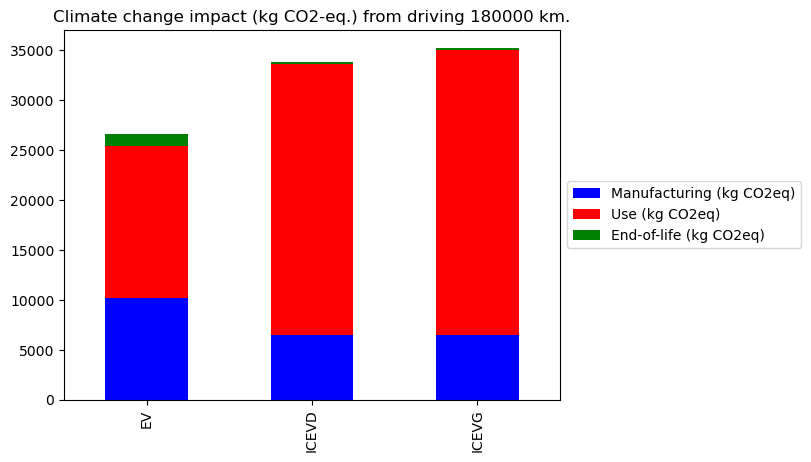

In [23]:
### Create the stacked bar chart
df_to_plot.T.plot(kind='bar', stacked=True, color=['blue', 'red', 'green'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Climate change impact (kg CO2-eq.) from driving 180000 km.')

Which of the following statements are correct?
1. Electric vehicles have consistently lower emissions during production, use, and end-of-life phases.
2. Electric vehicles produce fewer emissions solely during the use phase, while having higher emissions during the production and end-of-life phases. In scenarios with very short periods of vehicle use, the increased emissions during production may outweigh the benefits of lower emissions during use.
3. Electric vehicles are never a greener option, irrespective of the context or size of the battery. 
4. The gasoline vehicle emits less than the diesel vehicle, and thus achieves lower climate change impact in total. 
5. The substantial environmental impact related to disposal of electric vehicle end-of-life treatment stems from the separate handling of Li-ion batteries.

Define your answer as the variable `answer_3` (e.g. `answer_3 = {1}` if you think the correct statement is statement {1} or `answer_3 = {1, 2}` if you think the correct statements are statements {1, 2}).

In [24]:
answer_3 = {2, 5}

**_Run the cell under to check the format of your answer(s)_**

In [25]:
assert all (type(i) in [set] for i in [answer_3]), 'The answer(s) must be a set of values'

## 4. Climate change impact of the electric vehicle powered by electricity based on (1) coal and (2) hydropower _(20 points)_

Calculate `d_EV_coal` and `d_EV_hydro` by replacing 'Electricity by gas - TJ' to 'Electricity by coal - TJ' and 'Electricity by hydro - TJ' for the 'Operation electric car'. Rename their columns as "Total impacts".

In [26]:
### Abf_coal and Abf_hydro are a copy of Abf and these are the DataFrames you have to modify. Otherwise, if you use Abf directly, you will change its values.
Abf_coal = Abf.copy()
Abf_hydro = Abf.copy()

In [27]:
### About EV with electricity from coal
### Calculate d_EV_coal
Abf_coal.loc['Electricity by coal - TJ', 'Operation electric car'] = Abf.loc['Electricity by gas - TJ', 'Operation electric car']
Abf_coal.loc['Electricity by gas - TJ', 'Operation electric car'] = 0
A1 = pd.concat([Aff, Afb], axis = 1)
A2 = pd.concat([Abf_coal, Abb], axis = 1)
A_coal = pd.concat([A1, A2], axis = 0)
A_coal = A_coal.fillna(0)
print(A_coal.loc['Electricity by coal - TJ', 'Operation electric car'])
print(A_coal.loc['Electricity by gas - TJ', 'Operation electric car'])

I = np.identity(len(A_coal))
Larr = np.linalg.inv(I-A_coal)
L_coal = pd.DataFrame(Larr, index = A.index, columns = A.columns)
x_EV_coal = L_coal @ y_EV
x_EV_coal = x_EV_coal.rename(columns = {'Final demand' : 'Output'})
d_EV_coal = C @ S @ x_EV_coal
d_EV_coal = d_EV_coal.rename(columns = {'Output' : 'Total impacts'})

7.099919999999999e-07
0.0


**_Run the cell under to check the format of your answer(s)_**

In [28]:
assert (d_EV_coal.index == C.index).all(), 'The index do not correspond'
assert (d_EV_coal.columns == ['Total impacts']).all(), 'The columns do not correspond'

In [29]:
### About EV with electricity from hydropower
### Calculate d_EV_hydro
Abf_hydro.loc['Electricity by hydro - TJ', 'Operation electric car'] = Abf.loc['Electricity by gas - TJ', 'Operation electric car']
Abf_hydro.loc['Electricity by gas - TJ', 'Operation electric car'] = 0
A1 = pd.concat([Aff, Afb], axis = 1)
A2 = pd.concat([Abf_hydro, Abb], axis = 1)
A_hydro = pd.concat([A1, A2], axis = 0)
A_hydro = A_hydro.fillna(0)
#display(A)

I = np.identity(len(A_hydro))
Larr = np.linalg.inv(I-A_hydro)
L_hydro = pd.DataFrame(Larr, index = A.index, columns = A.columns)
x_EV_hydro = L_hydro @ y_EV
x_EV_hydro = x_EV_hydro.rename(columns = {'Final demand' : 'Output'})
d_EV_hydro = C @ S @ x_EV_hydro
d_EV_hydro = d_EV_hydro.rename(columns = {'Output' : 'Total impacts'})

**_Run the cell under to check the format of your answer(s)_**

In [30]:
assert (d_EV_hydro.index == C.index).all(), 'The index do not correspond'
assert (d_EV_hydro.columns == ['Total impacts']).all(), 'The columns do not correspond'

Text(0.5, 1.0, 'Climate change impact (kg CO2-eq.) from driving 180000 km.')

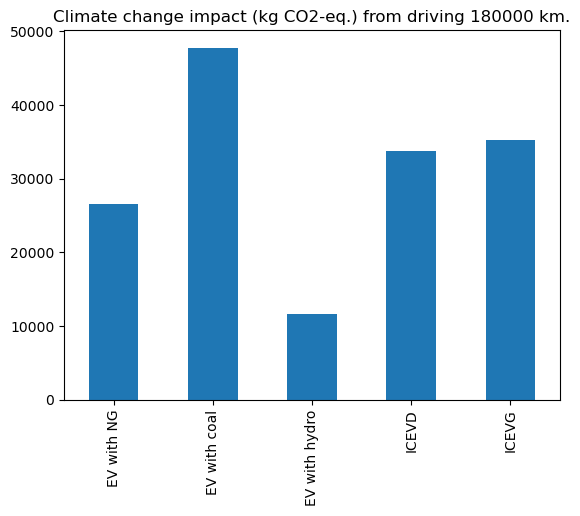

In [31]:
### Create the stacked bar chart comparing the Climate change impacts of all the vehicles from driving 180000km 
pd.DataFrame([[
    d_EV.loc['Climate change - GWP100 (kg CO2-eq)'].values[0], 
    d_EV_coal.loc['Climate change - GWP100 (kg CO2-eq)'].values[0],
    d_EV_hydro.loc['Climate change - GWP100 (kg CO2-eq)'].values[0],
    d_ICEVD.loc['Climate change - GWP100 (kg CO2-eq)'].values[0],
    d_ICEVG.loc['Climate change - GWP100 (kg CO2-eq)'].values[0]
              ]], 
    columns = [
        'EV with NG', 
        'EV with coal', 
        'EV with hydro',
        'ICEVD',
        'ICEVG'
    ]).T.plot(kind='bar', legend = False)
plt.title('Climate change impact (kg CO2-eq.) from driving 180000 km.')

Based on the climate change impact shown in the graph above (Climate change impact (kg CO2-eq.) from driving 180000 km.), how do different energy sources for electric vehicles (EVs) influence the total climate change impact?

1. The use of hydropower-based electricity increases the total climate change impact by 30% compared to natural gas. 
2. Electric vehicles powered by hydropower-based electricity have about 65% lower climate change impact compared to traditional vehicles.
3. Conventional vehicles consistently have a lower climate change impact than electric vehicles, regardless of the energy source. 
4. For electric vehicles to make sense, the electricity mix needs to have low carbon-intensity. 
5. Using different sources for electricity production needed in the operation phase of an EV barely affects the climate change impact.

Define your answer as the variable `answer_4` (e.g. `answer_4 = {1}` if you think the correct statement is statement {1} or `answer_4 = {1, 2}` if you think the correct statements are statements {1, 2}).

In [32]:
answer_4 = {2, 4}

**_Run the cell under to check the format of your answer(s)_**

In [33]:
assert all (type(i) in [set] for i in [answer_4]), 'The answer(s) must be a set of values'

## 5. Structural Path Analysis for the EV and for the battery production _(15 points)_

The figure below reprends the Structural Path Analysis for the EV obtained by running the following code.

`### Structural Path Analysis for the EV`

`SPA_EV = run_SPA.run_SPA_using_pyspa(A, C, S, y_EV, 'Climate change - GWP100 (kg CO2-eq)', 'DR_GHG_emissions_(kgCO2e)', 'TR_GHG_emissions_(kgCO2e)', 4, 'files_PS10_V3_0/run_SPA_folder/Thresholds_template_perc.csv')`

<img src="files_PS10_V3_0/SPA_EV.PNG">

Which of the following statements are correct regarding the structural path analysis for the EV?

1. Direct emissions from electricity production used in the operation of the EV vehicle is the most important contributor to climate change impacts.
2. Impacts from processes related to the manufacturing of the vehicles' components are negligible. 
3. Amongst the 10 most significant paths, half of them are related to direct emissions from electricity production processes.

Define your answer as the variable `answer_5a` (e.g. `answer_5a = {1}` if you think the correct statement is statement {1} or `answer_5a = {1, 2}` if you think the correct statements are statements {1, 2}).

In [34]:
answer_5a = {1, 3}

**_Run the cell under to check the format of your answer(s)_**

In [35]:
assert all (type(i) in [set] for i in [answer_5a]), 'The answer(s) must be a set of values'

Now, imagine you have to run a Structural Path Analysis for the battery of the EV ('Battery_Li_NCM') only. Among the parameters that the function run_SPA.run_SPA_using_pyspa(...) requires, changing `y` is the easiest way to proceed. How would you change it to run an SPA for the battery of the EV? Name your new final demand vector `y_battery`.

In [36]:
y_battery = y_EV.copy()
y_battery.loc['Battery_Li_NCM']=1
y_battery.loc['EV Li-NCM']=0
display(y_battery)

,Final demand
EV Li-NCM,0.0
ICEV D,0.0
ICEV G,0.0
Body_and_Doors,0.0
Brakes_Friction,0.0
...,...
Membership organisation services n.e.c. (91) - Meuro,0.0
Recreational; cultural and sporting services (92) - Meuro,0.0
Other services (93) - Meuro,0.0
Private households with employed persons (95) - Meuro,0.0


**_Run the cell under to check the format of your answer(s)_**

In [37]:
assert (y_battery.columns == ['Final demand']).all(), 'The columns do not correspond'

After running an SPA for the battery only, we get the following results:

<img src="files_PS10_V3_0/SPA_battery.PNG">

**True or false?**

Direct emissions from electricity production by gas is the most important contributor to climate change according to the structural path analysis of the EV battery. 

Define your answer as the variable `answer_5b` (e.g. `answer_5b = {True}` if you think the statement is True).

In [38]:
answer_5b = {False}

**_Run the cell under to check the format of your answer(s)_**

In [39]:
assert all (type(i) in [set] for i in [answer_5b]), 'The answer(s) must be a set of values'

## 6. Factors determining whether EVs can decrease climate change impact compared to conventional vehicles _(10 points)_

Using the insights from the structural path analysis of the EV battery, the three most efficient approaches to addressing the climate change impact are...

1. Diminishing electricity consumption during battery production
2. Upscaling EV batteries. 
3. Utilizing electricity derived from less carbon intensive sources.
4. Improved the end-of-life treatment of EV batteries. 
5. Switching to a local EV battery supplier to lower impact from transportation. 


Define your answer as the variable `answer_6a` (e.g. `answer_6a = {1}` if you think the correct statement is statement {1} or `answer_6a = {1, 2}` if you think the correct statements are statements {1, 2}).

In [40]:
answer_6a = {1, 3, 4}

**_Run the cell under to check the format of your answer(s)_**

In [41]:
assert all (type(i) in [set] for i in [answer_6a]), 'The answer(s) must be a set of values'

The composition of the electricity mix plays a major role in the climate change impact within...

1. EV production and use phase
2. EV manufacturing phase exclusively
3. None of the EV phases

Define your answer as the variable `answer_6b` (e.g. `answer_6b = {1}` if you think the correct statement is statement {1} or `answer_6b = {1, 2}` if you think the correct statements are statements {1, 2}).

In [42]:
answer_6b = {1}

**_Run the cell under to check the format of your answer(s)_**

In [43]:
assert all (type(i) in [set] for i in [answer_6b]), 'The answer(s) must be a set of values'